#  Sea Level Anomalies Basemap 

As I noted above, before we can do any plotting, we need to unpack the data. To do this, we use the Dataset class of the netCDF4 module.

In [1]:
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import numpy as np
ds = Dataset('mystery_file.nc')

We start by opening the file that contains the variables we want to eventually plot. ds becomes the file handle of the open netCDF file, and the ‘r’ denotes that we want to open the file in read only mode.

In [2]:
ds.variables

OrderedDict([('latitude', <class 'netCDF4._netCDF4.Variable'>
              float32 latitude(latitude)
                  axis: Y
                  bounds: lat_bnds
                  long_name: Latitude
                  standard_name: latitude
                  units: degrees_north
                  valid_max: 89.875
                  valid_min: -89.875
                  _CoordinateAxisType: Lat
              unlimited dimensions: 
              current shape = (120,)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('longitude', <class 'netCDF4._netCDF4.Variable'>
              float32 longitude(longitude)
                  axis: X
                  bounds: lon_bnds
                  long_name: Longitude
                  standard_name: longitude
                  units: degrees_east
                  valid_max: 359.875
                  valid_min: 0.125
                  _CoordinateAxisType: Lon
              unlimited dimensions: 
           

In [3]:
print(ds.variables.keys())

odict_keys(['latitude', 'longitude', 'sla', 'time'])


Now we can read the data from any of the variables contained in fh. For this example, we’ll just read the coordinate variables (lat, lon, time) and the sla variable. This puts each of these variables into numpy arrays.

In [4]:
sla = ds.variables['sla'][:]
time = ds.variables['time'][:]
lat = ds.variables['latitude'][:]
lon = ds.variables['longitude'][:]

Finally, it is good form to close the file when you are finished.

In [5]:
ds.close()

At this point, if you need to do any analysis on the data (i.e. get the statistics), you can use numpy/scipy to do so.

# Plotting georeferenced data using Python

Now that we have our data in numpy arrays, we can move forward, using Python and Matplotlib to plot our data.

In [6]:
import os
import conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap

Next, we setup a Basemap instance, specifying our desired map and projection settings.

In [7]:
# Get some parameters for the Stereographic Projection
lon_0 = lon.mean()
lat_0 = lat.mean()

In [8]:
# ortho
#m=Basemap(lat_0=0, lon_0=0, projection='ortho' )
#m.drawmapboundary(fill_color='#A6CAE0')
#m.fillcontinents(color='grey', alpha=0.3)


In [9]:
m = Basemap(width=5000000,height=3500000,
            resolution='l',projection='stere',\
            lat_ts=40,lat_0=lat_0,lon_0=lon_0)

In [10]:
#m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,\
           # llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')

When we give this Basemap instance our coordinate variables, it returns our plotting coordinates. This is how basemap knows where to put our projected data on the map.

In [11]:
# Because our lon and lat variables are 1D,
# use meshgrid to create 2D arrays
# Not necessary if coordinates are already in 2D arrays.
lons, lats = np.meshgrid(lon, lat)
xi, yi = m(lons, lats)

In [12]:
print(xi, yi)

[[-213139.43582846 -186271.63358942 -159411.53606771 ... 5159411.53606771
  5186271.63358943 5213139.43582846]
 [-206893.46018642 -180092.15279354 -153298.39043292 ... 5153298.39043293
  5180092.15279355 5206893.46018642]
 [-200628.36152259 -173893.73105598 -147166.48613666 ... 5147166.48613666
  5173893.73105599 5200628.36152259]
 ...
 [ 656419.80483145  674236.25471018  692060.72619256 ... 4307939.27380745
  4325763.74528983 4343580.19516855]
 [ 665189.89687357  682917.17206797  700652.56170925 ... 4299347.43829075
  4317082.82793203 4334810.10312644]
 [ 673985.87638595  691623.75609141  709269.84206184 ... 4290730.15793816
  4308376.2439086  4326014.12361405]] [[ 377882.85010988  372077.23573996  366333.69415363 ...  366333.69415363
   372077.23573996  377882.85010988]
 [ 406582.89417896  400769.09224907  395017.43082576 ...  395017.43082576
   400769.09224907  406582.89417896]
 [ 435259.32593947  429437.49471453  423677.86991139 ...  423677.86991139
   429437.49471453  435259.32593

Now, we can plot the data using one of the available plot types (pcolor, pcolormesh, contour, contourf, scatter, etc.). Here we use pcolor. Gridlines, colorbars, and axis labels can also be added at this point.

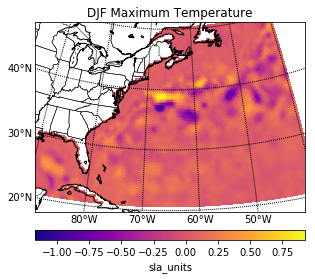

In [13]:
# Plot Data
cs = m.pcolor(xi,yi,np.squeeze(sla[0,:,:]), cmap="plasma")

# Add Grid Lines
m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
m.drawstates()
m.drawcountries()

# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.set_label("sla_units")

# Add Title
plt.title('DJF Maximum Temperature')

plt.show()

In [14]:
np.squeeze(sla).shape

(1462, 120, 205)

In [15]:
import datetime

In [16]:
def date_adder_full(t1):
    start_date = datetime.datetime(1950, 1, 1)
    delta_t = datetime.timedelta(days= t1)
    days_now = start_date + delta_t
    return (days_now.strftime("%-m /%d /%Y") )

In [17]:
print(date_adder_full(int(time[1461])))

6 /10 /2018


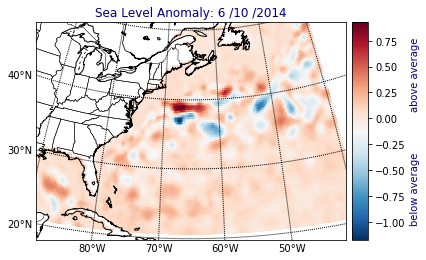

In [18]:
# Plot Data
cs = m.pcolor(xi,yi,np.squeeze(sla[0,:,:]), cmap="RdBu_r")

# Add Grid Lines
m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
m.drawstates()
m.drawcountries()

# Add Colorbar
cbar = m.colorbar(cs) #location='bottom', pad="10%"
cbar.set_label(label="below average             above average", color="navy")

# Add Title
plt.title("Sea Level Anomaly: "+str(date_adder_full(int(time[0]))), color="navy")
#plt.xlabel("Longitude", color='darkmagenta')
#plt.ylabel("Latitude", color='darkmagenta')

plt.show()

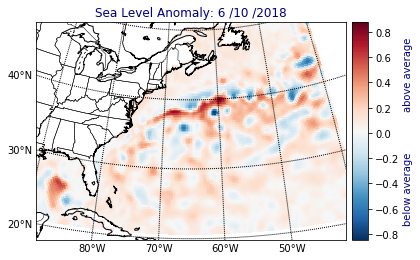

In [19]:
# Plot Data
cs = m.pcolor(xi,yi,np.squeeze(sla[1461,:,:]), cmap="RdBu_r")

# Add Grid Lines
m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
m.drawstates()
m.drawcountries()

# Add Colorbar
cbar = m.colorbar(cs) #location='bottom', pad="10%"
cbar.set_label(label="below average             above average", color="navy")

# Add Title
plt.title("Sea Level Anomaly: "+str(date_adder_full(int(time[1461]))), color="navy")
#plt.xlabel("Longitude", color='darkmagenta')
#plt.ylabel("Latitude", color='darkmagenta')

plt.show()